In [1]:
%matplotlib inline

In [2]:
import os, glob, serial
from pylab import *

In [56]:
class MicroSpec(object):
    def __init__(self, port):
        self._ser = serial.Serial(port,baudrate=115200)
    def set_integration_time(self, seconds):
        cmd = "SPEC.INTEG %0.6f\n" % seconds
        self._ser.write(cmd.encode('utf8'))
    def read(self):
        self._ser.write(b"SPEC.READ?\n")
        sdata = self._ser.readline()
        sdata = array([int(p) for p in sdata.split(b",")])
        self._ser.write(b"SPEC.TIMING?\n")
        tdata = self._ser.readline()
        tdata = array([int(p) for p in tdata.split(b",")])
        return (sdata, tdata)
    
    
DATASET_NAME = "Xenon-20-watt_no-filt_3inch-water_integ50us"
#mpl.rcParams["savefig.directory"] = os.path.dirname(__file__)

port = glob.glob("/dev/cu.usbmodem1411")[0]
    
spec = MicroSpec(port)
icc = spec.set_integration_time(200e-3)

In [29]:
pix=arange(1,289);

A_0=3.152446842e+2; B_1=2.688494791; B_2=-8.964262020e-4;
B_3=-1.030880174e-5; B_4=2.083514791e-8; B_5=-1.290505933e-11;

nm=A_0+B_1*pix+B_2*pix**2+B_3*pix**3+B_4*pix**4+B_5*pix**5;

In [44]:
sdata, tdata = spec.read()

(100, 300)

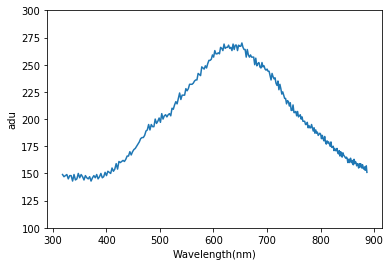

In [46]:
plot(nm,sdata);
xlabel('Wavelength(nm)')
ylabel('adu')
ylim([100,300])

CFL Bulb:

(0, 800)

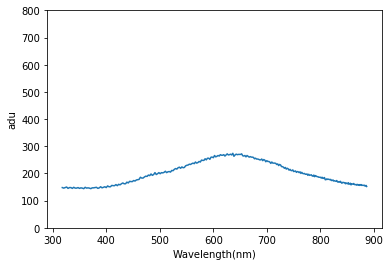

In [47]:
icc = spec.set_integration_time(1)
sdata, tdata = spec.read()
plot(nm,sdata);
xlabel('Wavelength(nm)')
ylabel('adu')
ylim([0,800])

Incandescent:

(0, 400)

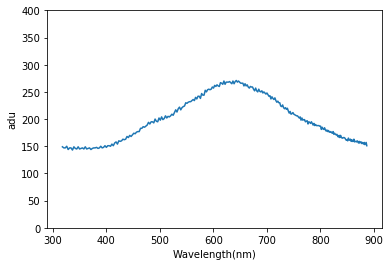

In [48]:
icc = spec.set_integration_time(1)
sdata, tdata = spec.read()
plot(nm,sdata);
xlabel('Wavelength(nm)')
ylabel('adu')
ylim([0,400])

Phone LED:

(0, 1000)

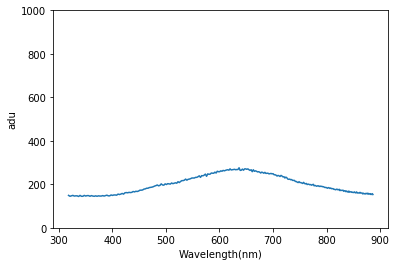

In [49]:
icc = spec.set_integration_time(1)
sdata, tdata = spec.read()
plot(nm,sdata);
xlabel('Wavelength(nm)')
ylabel('adu')
ylim([0,1000])

LED Overheads:

(0, 1000)

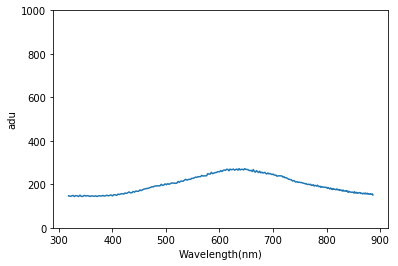

In [50]:
icc = spec.set_integration_time(1)
sdata, tdata = spec.read()
plot(nm,sdata);
xlabel('Wavelength(nm)')
ylabel('adu')
ylim([0,1000])

Candlelight:

(0, 400)

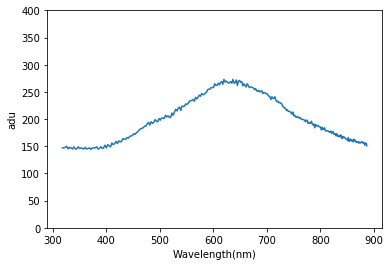

In [51]:
icc = spec.set_integration_time(1)
sdata, tdata = spec.read()
plot(nm,sdata);
xlabel('Wavelength(nm)')
ylabel('adu')
ylim([0,400])

In [52]:
def capture_and_plot(integration_time):
    icc = spec.set_integration_time(integration_time)
    sdata, tdata = spec.read()
    plot(nm,sdata);
    xlabel('Wavelength(nm)')
    ylabel('adu')
    #title('Integration_time='+str(integration_time))

In [65]:
def integration_plot(start,end,step):
    y=[]
    times=[]
    int_time=start
    while int_time <= end:
        icc = spec.set_integration_time(int_time)
        sdata, tdata = spec.read()
        y.append(sdata)
        times.append(int_time)
        int_time=int_time+step
    return y,times

In [68]:
y,times=integration_plot(.1,5.5,.05)

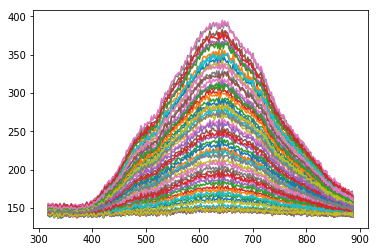

In [69]:
for i in range(0,len(y)):
    plot(nm,y[i]);

In [70]:
spec._ser.write(b"SPEC.TIMING?\n")

13

In [71]:
tdata = spec._ser.readline()

In [72]:
tdata

'64952,64984,256,936,41968,0,0,0,0,0\n'

In [73]:
tdata = array([int(p) for p in tdata.split(b",")])

In [74]:
tdata

array([64952, 64984,   256,   936, 41968,     0,     0,     0,     0,
           0])